## 가장 빠른 길 찾기
+ 최단거리 알고리즘 : 다익스트라, 플로이드 워셜
+ 보통 그래프를 이용해 표현
+ 각 지점은 그래프의 노드, 지점간 연결된 도로는 간선으로 표현

## 다익스트라 최단 경로 알고리즘
+ 그래프에서 여러개의 노드가 있을 때, 특정한 노드에서 출발하여 다른 노드로 가는 각각의 최단 경로를 구해주는 알고리즘
+ '음의 간선'이 없을 때 정상적으로 동작, 현실 세계의 길(간선)은 음의 간선이 없으므로 GPS소프트웨어의 기본 알고리즘으로 많이 채택됨
+ 매번 가장 비용이 적은 노드를 선택하는 그리디 알고리즘으로 분류
1. 출발 노드를 설정
2. 최단 거리 테이블을 초기화
3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신
5. 위 과정에서 3과 4를 반복
+ 다익스트라 알고리즘은 최단 경로를 구하는 과정에서 '각 노드에 대한 현재까지의 최단 거리' 정보를 항상 1차원 리스트에 계속 갱신
+ ***방문하지 않은 노드 중에서 현재 최단 거리가 가장 짧은 노드***를 확인해 그 노드에 대하여 4번 과정을 수행한다는 점에서 그리디 알고리즘


## 다익스트라 알고리즘 구현 방법
1. 구현하기 쉽지만 느리게 동작하는 코드
2. 구현하기에 조금 더 까다롭지만 빠르게 동작하는 코드

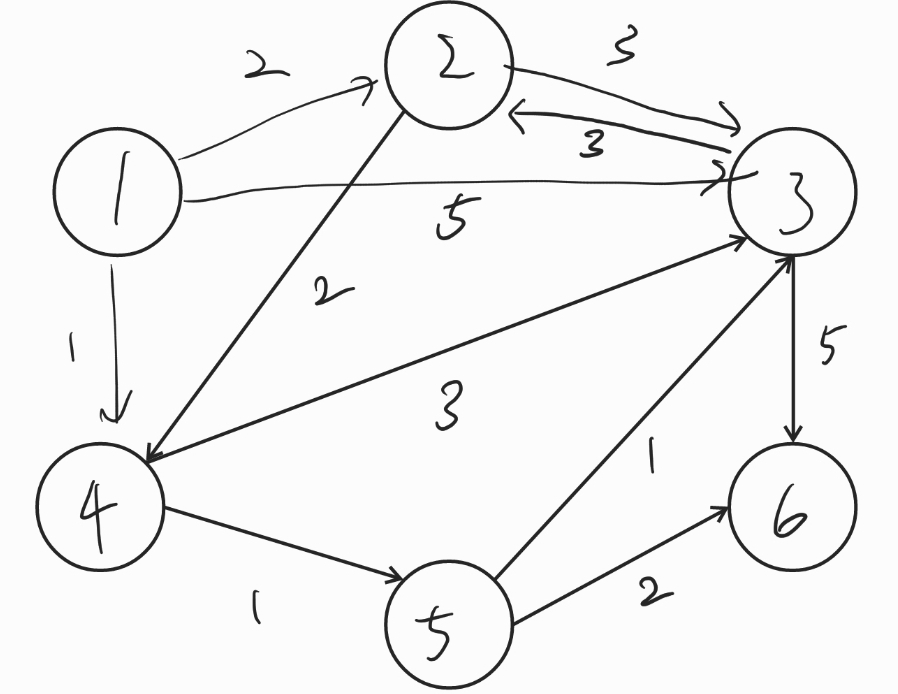

In [2]:
# 간단한 다익스트라 알고리즘
# import sys
# input = sys.stdinQ\.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수
n, m = map(int, input().split())
# 시작 노드 번호
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트 만들기
graph = [[] for i in range(n+1)]
# 방문한 적이 있는지 체크하는 목적의 리스트 만들기
visited = [False] * (n+1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

# 모든 간선 정보 입력받기
for _ in range(m):
  a, b, c = map(int, input().split())
  # a번 노드에서 b번 노드로 가는 비용이 c
  graph[a].append((b,c))

# 방문하지 않은 노드 중에서 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
  min_value = INF
  index = 0 # 가장 최단 거리가 짧은 노드(인덱스)
  for i in range(1, n + 1):
    if distance[i] < min_value and not visited[i]:
      min_value = distance[i]
      index = i
  return index

def dijkstra(start):
  # 시작 노드에 대해서 초기화
  distance[start] = 0
  visited[start] = True
  for j in graph[start]:
    distance[j[0]] = j[1]
  # 시작 노드를 제외한 전체 n - 1개의 노드에 대해 반복
  for i in (range(n - 1)):
    # 현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문처리
    now = get_smallest_node()
    visited[now] = True
    # 현재 노드와 연결된 다른 노드 확인
    for j in graph[now]:
      cost = distance[now] + j[1]
      if cost < distance[j[0]]:
        distance[j[0]] = cost

# 다익스트라 알고리즘 수행
dijkstra(start)

for i in range(1, n + 1):
  if distance[i] == INF:
    print("INFINITY")
  else:
    print(distance[i])

6 11
1
1 2 2 
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


+ 전체 노드 개수가 5000개 이하라면 일반적으로 이 코드로 해결 가능
+ 노그 개수가 10000개가 넘어가는 문제라면 개선된 다익스트라 알고리즘을 이용해야함

## 개선된 다익스트라 알고리즘
+ 힙 자료구조를 사용
+ 힘 자료구조를 이용하게 되면 특정 노드까지의 최단 거리에 대한 정보를 힙에 담아 처리하므로 출발 노드로부터 가장 거리가 짧은 노드를 더욱 빠르게 찾을 수 있음
+ 이 과정에서 로그 시간이 걸림, N = 1000000일 때 log2N이 20인 것을 감안하면 속도가 획기적으로 빨리짐

## 힙 자료구조
+ 큐를 구현하기 위하여 사용하는 자료 구조 중 하나
1. 스택 : 가장 나중에 삽입된 데이터 먼저 삭제
2. 큐 : 가장 먼저 삽입된 데이터 먼저 삭제
3. 우선순위 큐 : 가장 우선순위가 높은 데이터 먼저 삭제
+ 여러 개의 물건 데이타를 자료구조에 넣었다가 가치가 높은 물건 데이터 부터 꺼내서 확인해야 하는 경우 우선순위 큐 사용
+ 우선순위 값을 표현할 때는 일반적으로 정수형 자료형의 변수 사용
+ 예를 들어 물건 정보가 있고 물건의 가치는 물건의 무게로만 구성된다고 가정
  
  그러면 모든 물건 데이터를 (가치, 물건)으로 묶어서 우선순위 큐 자료구조에 넣을 수 있음


In [3]:
# 개선된 다익스트라 알고리즘 소스코드
import heapq
# colab sys.stdin.readline 안먹힘
# import sys
# input = sys.stdin.readline
INF = int(1e9)

# 노드 개수, 간선 개수
n, m = map(int, input().split())
# 시작 노드 번호
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보 담기
graph = [[] for i in range(n + 1)]
# 최단거리 테이블 모두 무한으로 초기화
distance = [INF] * (n+1)

# 간선 정보
for _ in range(m):
  a, b, c = map(int, input().split())
  graph[a].append((b,c))

def dijkstra(start):
  q = []
  # 시작 노드로 가기 위한 최단 경로는 0으로 설정, 큐에 삽입
  heapq.heappush(q, (0, start))
  distance[start] = 0
  while q: # q가 빌때까지
    # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
    dist, now = heapq.heappop(q)
    # 현재 노드가 이미 처리된 적이 있으면 무시
    if distance[now] < dist:
      continue
    # 현재 노드와 연결된 다른 인접한 노드들을 확인
    for i in graph[now]:
      cost = dist + i[1]
      if cost < distance[i[0]]:
        distance[i[0]] = cost
        heapq.heappush(q, (cost, i[0]))

dijkstra(start)

for i in range(1, n+1):
  if distance[i] == INF:
    print("INFINITY")
  else:
    print(distance[i])

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
4 3 3
4 5 1
5 3 1
5 6 2
3 6 5
0
2
3
1
2
4


## 플로이드 워셜 알고리즘
+ 모든 지점에서 다른 모든 지점까지의 최단 경로를 모두 구해야 하는 경우 사용
+ 핵심 아이디어를 이해하는 것이 중요
+ 단계마다 거쳐가는 노드를 기준으로 알고리즘 수행
+ 1번 노드 부터 6번 노드까지 각 노드를 거쳐가는 모든 경우를 고려해서 최단 거리 계산
+ 시간 복잡도는 O(N^3)

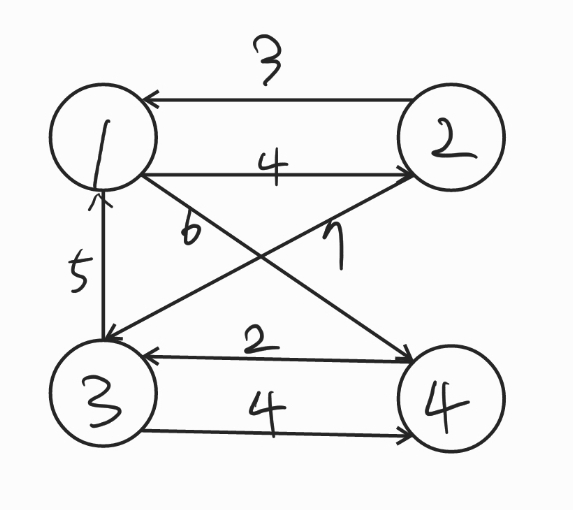

In [7]:
# 플로이드 워셜 알고리즘
INF = int(1e9)

n = int(input())
m = int(input())
# 그래프를 2차원 리스트로 만들고 모든값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]
# 자기자신에서 자기자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
  for b in range(1, n+1):
    if a == b:
      graph[a][b] = 0

for _ in range(m):
  a, b, c = map(int, input().split())
  graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n+1):
  for a in range(1, n+1):
    for b in range(1, n+1):
      graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

for a in range(1, n+1):
  for b in range(1, n+1):
    if graph[a][b] == INF:
      print("INFINITY", end=" ")
    else:
      print(graph[a][b], end=" ")
  print()



4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


## 미래도시
+ 전형적인 플로이드 워셜 문제
+ 노드개수 N이 100이하로 매우 한정적이므로 플로이드 워셜 알고리즘으로 빠르게 해결 가능

In [8]:
INF = int(1e9)

n, m = map(int, input().split())
graph = [[INF] * (n+1) for _ in range(n+1)]

for a in range(1, n+1):
  for b in range(1, n+1):
    if a == b:
      graph[a][b] = 0

# 각 간선에 대한 비용을 1이라고 가정
for _ in range(m):
  a, b = map(int, input().split())
  graph[a][b] = 1
  graph[b][a] = 1

# 거쳐 갈 노드 X와 최종 목적지 노드 K
x, k = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
  for a in range(1, n+1):
    for b in range(1, n+1):
      graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

distance = graph[1][k] + graph[k][x]

if distance >= INF:
  print("-1")
else:
  print(distance)

5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5
3


## 전보
+ 한 도시에서 다른 도시까지의 최단거리 문제로 치환할 수 있으므로 다익스트라 알고리즘
+ N과 M의 범위가 충분히 크기 때문에 우선순위 큐를 이용한 다익스트라 알고리즘 사용해야함

In [10]:
import heapq

INF = int(1e9)

# 노드 개수, 간선 개수, 시작 노드
n, m, start = map(int, input().split())
# 각 노드에 연결되어 있는 노드 정보를 담는 리스트
graph = [[] for i in range(n+1)]

distance = [INF] * (n+1)

for _ in range(m):
  x, y, z = map(int, input().split())
  graph[x].append((y,z))

def dijkstra(start):
  q = []
  heapq.heappush(q, (0, start))
  distance[start] = 0
  while q:
    dist, now = heapq.heappop(q)
    if distance[now] < dist:
      continue
    for i in graph[now]:
      cost = dist + i[1]
      if cost < distance[i[0]]:
        distance[i[0]] = cost
        heapq.heappush(q, (cost, i[0]))

dijkstra(start)

# 도달할 수 있는 노드의 개수
count = 0
# 도달할 수 있는 노드 중에서 가장 멀리있는 노드와의 최단 거리
max_distance = 0
for d in distance:
  if d != INF:
    count += 1
    max_distance = max(max_distance, d)

# 시작 노드는 제거
print(count - 1, max_distance)

3 2 1
1 2 4
1 3 2
2 4


In [ ]:
()